In [90]:
from glob import iglob
import os
import cPickle as pk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.charts import Line, show, output_file
from bokeh.io import output_notebook
from bokeh.mpl import to_bokeh as tb
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [2]:
list(iglob('*.pdf'))

['03_2015_%20MMR_report_draft.pdf',
 '04_2015_MMR_Stats.pdf',
 '05_2015_MMR_report.pdf',
 '06_2015_MMR_report.pdf',
 '07_2015_MMRReport.pdf',
 '09_2015_MMRreport.pdf',
 'CHED-MMJ_1_2015_MMR_REPORT.pdf',
 'CHED_MMJ_01-2009_1.pdf',
 'CHED_MMJ_01_2013_MMR_report.pdf',
 'CHED_MMJ_01_2014_MMR_report.pdf',
 'CHED_MMJ_02-2009_1.pdf',
 'CHED_MMJ_02_2013_MMR_report.pdf',
 'CHED_MMJ_02_2014_MMR_report.pdf',
 'CHED_MMJ_08_2013_MMR_report.pdf',
 'CHED_MMJ_08_2014_%20MMR_report.pdf',
 'CHED_MMJ_09-2009_1.pdf',
 'CHED_MMJ_09_2013_MMR_report.pdf',
 'CHED_MMJ_09_2014_%20MMR_report_0.pdf',
 'CHED_MMJ_10-2009_1.pdf',
 'CHED_MMJ_10_2013_MMR_report.pdf',
 'CHED_MMJ_10_2014_%20MMR_report.pdf',
 'CHED_MMJ_11-2009_1.pdf',
 'CHED_MMJ_11_2013_MMR_report.pdf',
 'CHED_MMJ_11_2014_%20MMR_report.pdf',
 'CHED_MMJ_12-2009_1.pdf',
 'CHED_MMJ_12_2013_MMR_report.pdf',
 'CHED_MMJ_12_2014_MMR_Report.pdf',
 'CHED_MMR_01_2010_%20MMR_report_draft.pdf',
 'CHED_MMR_01_2011_MMR_report.pdf',
 'CHED_MMR_01_2012_MMR_report.pdf',


In [109]:
def parse_pdf_gender(file_n):
    genderWords = set(['Gender', 'Sex'])
    with open(file_n) as f:
        table1 = False
        table1dat = []
        for l in f.readlines():
            words = [i.strip('\n').strip() for i in l.split('  ') if i != '' and i != '\n']
            if len(words) > 0 and words[0] in genderWords:
                table1 = True
            if table1:
                table1dat.append(words)
                if len(words) == 0:
                    table1 = False
                    table1dat = table1dat[:-2] # get rid of blank line and **
                    table1dat[0] = [t.strip('**') for t in table1dat[0]]

        return table1dat

In [4]:
report_dict = pk.load(open('reports_dict.pk'))

In [18]:
years = sorted(report_dict.keys())
years.remove('2009')

In [19]:
years

['2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [20]:
[r.split('/')[-1] for r in report_dict['2009'][::-1]]

['CHED_MMJ_01-2009_1.pdf',
 'CHED_MMJ_02-2009_1.pdf',
 'CHED_MMJ_03-2009_1.pdf',
 'CHED_MMJ_04-2009_1.pdf',
 'CHED_MMJ_05-2009_1.pdf',
 'CHED_MMJ_06-2009_1.pdf',
 'CHED_MMJ_07-2009_1.pdf',
 'CHED_MMJ_08-2009_1.pdf',
 'CHED_MMJ_09-2009_1.pdf',
 'CHED_MMJ_10-2009_1.pdf',
 'CHED_MMJ_11-2009_1.pdf',
 'CHED_MMJ_12-2009_1.pdf']

In [24]:
r1 = [r.split('/')[-1] for r in report_dict[years[0]][::-1]][0]

In [25]:
r1

'CHED_MMR_01_2010_%20MMR_report_draft.pdf'

In [26]:
os.system("pdftotext -layout " +  r1 + " " + r1.split('.')[0] + ".txt")

0

In [30]:
t1d = parse_pdf_gender(r1.split('.')[0] + ".txt")

['Sex', 'Percent on Registry', 'Average Age**']
['Male', '73%', '39']
['Female', '27%', '42']
['** The overall average age of all patients is 40 years old.']
[]


In [31]:
t1d

[['Sex', 'Percent on Registry', 'Average Age**'],
 ['Male', '73%', '39'],
 ['Female', '27%', '42']]

In [65]:
t1ds = []
docYears = []
for y in years:
    for rep in [r.split('/')[-1] for r in report_dict[y][::-1]]:
        docYears.append(int(y))
        print rep
        os.system("pdftotext -layout " +  rep + " " + rep.split('.')[0] + ".txt")
        t1d = parse_pdf_gender(rep.split('.')[0] + ".txt")
        t1ds.append(t1d)
        print t1d  

CHED_MMR_01_2010_%20MMR_report_draft.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '73%', '39'], ['Female', '27%', '42']]
CHED_MMR_02_2010_%20MMR_report_draftx.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '72%', '39'], ['Female', '28%', '42']]
CHED_MMR_03_2010_%20MMR_report_draft.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '72%', '39'], ['Female', '28%', '42']]
CHED_MMR_04_2010_%20MMR_report_draft.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '71%', '39'], ['Female', '29%', '42']]
CHED_MMR_05_2010_%20MMR_report_draft.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '71%', '39'], ['Female', '29%', '42']]
CHED_MMR_06_2010_%20MMR_report_draft.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '71%', '39'], ['Female', '29%', '42']]
CHED_MMR_07_2010_%20MMR_report_draft.pdf
[['Sex', 'Percent on Registry', 'Average Age'], ['Male', '70%', '39'], ['Female', '30%', '41']]
CHED_MMR_08_2010_%20MMR_report_draft.pdf

In [66]:
gender_data = {}
gender_data['male'] = {}
gender_data['male']['percent on registry'] = []
gender_data['male']['average age'] = []
gender_data['female'] = {}
gender_data['female']['percent on registry'] = []
gender_data['female']['average age'] = []

In [67]:
for t in t1ds:
    agecol = 2
    pctcol = 1
    if t[0][1] == 'Average Age':
        agecol = 1
        pctcol = 2
    
    male = t[1]
    female = t[2]
    gender_data['male']['percent on registry'].append(float(male[pctcol].strip('%')))
    gender_data['female']['percent on registry'].append(float(female[pctcol].strip('%')))
    gender_data['male']['average age'].append(float(male[agecol]))
    gender_data['female']['average age'].append(float(female[agecol]))

In [70]:
maleDF = pd.DataFrame(gender_data['male'])
maleDF['gender'] = 'male'
maleDF['year'] = docYears
femaleDF = pd.DataFrame(gender_data['female'])
femaleDF['gender'] = 'female'
femaleDF['year'] = docYears
genderDF = maleDF.append(femaleDF)

In [112]:
genderDF.head()

,average age,percent on registry,gender,year
0,39.0,73.0,male,2010
1,39.0,72.0,male,2010
2,39.0,72.0,male,2010
3,39.0,71.0,male,2010
4,39.0,71.0,male,2010


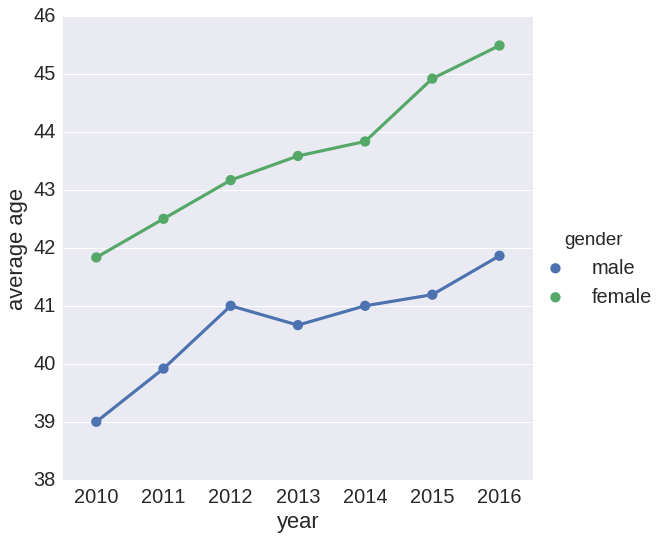

In [107]:
sns.set(font_scale=2)
g = sns.factorplot(x="year", y="average age", hue="gender",
                   data=genderDF,
                   size=8, ci=None)

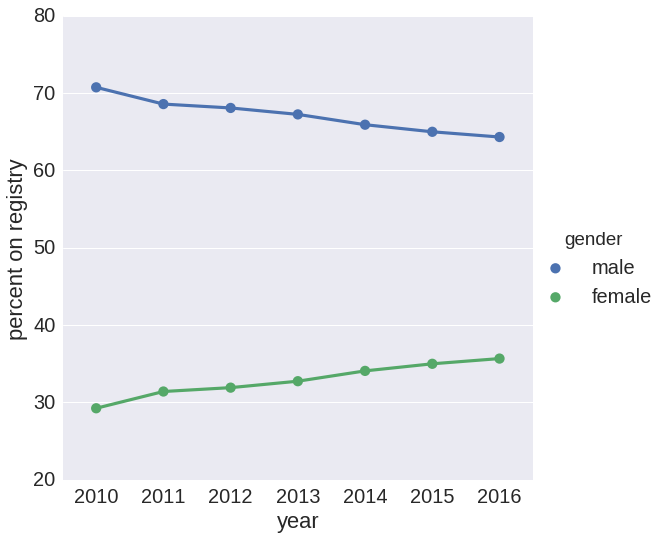

In [108]:
g = sns.factorplot(x="year", y="percent on registry", hue="gender",
                   data=genderDF,
                   size=8, ci=None)

In [ ]:
line = Line(genderDF, y=['python', 'pypy', 'jython'],
            dash=['python', 'pypy', 'jython'],
            color=['python', 'pypy', 'jython'],
            legend_sort_field = 'color',
            legend_sort_direction = 'ascending',
            title="Interpreter Sample Data", ylabel='Duration', legend=True)

output_file("line_single.html", title="line_single.py example")

show(line)

In [191]:
def parse_pdf_county(file_n):
    countyWords = set(['County', 'County (A-L)'])
    with open(file_n) as f:
        table = False
        two_col = False
        table_dat = []
        for l in f.readlines():
            words = [i.strip('\n').strip() for i in l.split('  ') if i != '' and i != '\n']
            if len(words) > 0 and words[0] in countyWords:
                table = True
                if words[0] == 'County (A-L)':
                    two_col = True
            if table:
                if two_col:
                    if len(words) < 1:
                        table = False
                        table_dat[1:] = sorted(table_dat[1:], key=lambda x: x[0])
                        continue
                    col1 = words[:3]
                    if words[0] == 'County (A-L)':
                        table_dat.append(['County', '# of Patients', '% of Patients'])
                    else:
                        table_dat.append(col1)
                        if len(words) > 3:
                            col2 = words[3:]
                            table_dat.append(col2)
                else:
    #                 print words
    #                 print words[0] == '* Indicates fewer than three patients in the category'
    #                 print table
                    if len(words) < 2:
                        if len(words) != 0 and words[0] == '* Indicates fewer than three patients in the category':
                            table = False
                        continue
                    table_dat.append(words)

        return table_dat

In [192]:
r1

'CHED_MMR_01_2010_%20MMR_report_draft.pdf'

In [193]:
county = parse_pdf_county(r1.split('.')[0] + ".txt")

In [194]:
len(county)

65

In [195]:
county_data = []
docYears = []
for y in years:
    for rep in [r.split('/')[-1] for r in report_dict[y][::-1]]:
        docYears.append(int(y))
        print rep
        county = parse_pdf_county(rep.split('.')[0] + ".txt")
        county_data.append(county)
        print len(county)

CHED_MMR_01_2010_%20MMR_report_draft.pdf
65
CHED_MMR_02_2010_%20MMR_report_draftx.pdf
65
CHED_MMR_03_2010_%20MMR_report_draft.pdf
65
CHED_MMR_04_2010_%20MMR_report_draft.pdf
65
CHED_MMR_05_2010_%20MMR_report_draft.pdf
65
CHED_MMR_06_2010_%20MMR_report_draft.pdf
65
CHED_MMR_07_2010_%20MMR_report_draft.pdf
65
CHED_MMR_08_2010_%20MMR_report_draft.pdf
65
CHED_MMR_09_2010_%20MMR_report_draft.pdf
65
CHED_MMR_10_2010_%20MMR_report_draft.pdf
65
CHED_MMR_11_2010_%20MMR_report_draft.pdf
65
CHED_MMR_12_2010_%20MMR_report.pdf
65
CHED_MMR_01_2011_MMR_report.pdf
65
CHED_MMR_02_2011_MMR_report.pdf
65
CHED_MMR_03_2011_MMR_report.pdf
65
CHED_MMR_04_2011_MMR_report.pdf
65
CHED_MMR_05_2011_MMR_report.pdf
65
CHED_MMR_06_2011_MMR_report.pdf
65
CHED_MMR_07_2011_MMR_report.pdf
65
CHED_MMR_08_2011_MMR_report.pdf
65
CHED_MMR_09_2011_MMR_report.pdf
65
CHED_MMR_10_2011_MMR_report.pdf
65
CHED_MMR_11_2011_MMR_report.pdf
65
CHED_MMR_12_2011_MMR_report.pdf
65
CHED_MMR_01_2012_MMR_report.pdf
65
CHED_MMR_02_2012_MMR_r

In [196]:
county_data[-1]

[['County', '# of Patients', '% of Patients'],
 ['Adams', '7,157', '7.0%'],
 ['Alamosa', '231', '<1%'],
 ['Arapahoe', '9,112', '8.9%'],
 ['Archuleta', '509', '<1%'],
 ['Baca', '41', '<1%'],
 ['Bent', '76', '<1%'],
 ['Boulder', '7,406', '7.2%'],
 ['Broomfield', '1,024', '<1%'],
 ['Chaffee', '371', '<1%'],
 ['Cheyenne', '21', '<1%'],
 ['Clear Creek', '333', '<1%'],
 ['Conejos', '60', '<1%'],
 ['Costilla', '189', '<1%'],
 ['Crowley', '87', '<1%'],
 ['Custer', '134', '<1%'],
 ['Delta', '594', '<1%'],
 ['Denver', '14,387', '14.0%'],
 ['Dolores', '60', '<1%'],
 ['Douglas', '2,949', '2.9%'],
 ['Eagle', '947', '<1%'],
 ['El Paso', '19,295', '18.8%'],
 ['Elbert', '283', '<1%'],
 ['Fremont', '1,321', '1.3%'],
 ['Garfield', '1,000', '<1%'],
 ['Gilpin', '230', '<1%'],
 ['Grand', '310', '<1%'],
 ['Gunnison', '209', '<1%'],
 ['Hinsdale', '7', '<1%'],
 ['Huerfano', '250', '<1%'],
 ['Jackson', '25', '<1%'],
 ['Jefferson', '10,774', '10.5%'],
 ['Kiowa', '9', '<1%'],
 ['Kit Carson', '52', '<1%'],
 ['La 